In [1]:
path = '/home/anna/Documents/Diploma/other_dumps/comments'

In [2]:
import pandas as pd

In [3]:
all_texts_comments = pd.read_csv(f'{path}/all_comments_to_theories_processed.csv')

In [4]:
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0


### Try sentiment analysis with Spacy (Text Blob)

In [5]:
# !pip3 install spacytextblob

In [6]:
# !python3 -m textblob.download_corpora
# !python3 -m spacy download en_core_web_sm

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
nlp.add_pipe('spacytextblob')

In [10]:
for c_id in [9403, 9408, 15054, 15115]:
    text = all_texts_comments[all_texts_comments.id == c_id].text.values[0]
    doc = nlp(text)
    print(doc._.polarity)
    print(text, '\n')

0.0
"...to divide between two your friends"
I think, it should be "two of your friends". 

0.06527777777777778
It was not completely clear for me, how to convert with subtraction method. 
I think, it worth to mention, that we subtract the biggest power from the number only the first time. Then we should find the largest number less than result of subtraction and subtract the first one from the second one. And as I understand, when we get 0, we should stop.
Maybe those things weren't clear only for me, but the rest of the article is so beautifully detailed and this part is too short. And step-by step algorithm is slightly confusing. 

0.0
completly not understood 

0.3
A better explanation is needed with clear definitions and examples for all cases of arithmetic operations 



In [11]:
def spacy_polarity(text, model):
    if len(text) > 50000:
        text = ''
    doc = model(text)
    polarity = doc._.polarity
    return polarity

In [12]:
polarities = []

for i, row in enumerate(all_texts_comments.iterrows()):
    if i % 1000 == 0:
        print(i)
    polarity = spacy_polarity(row[1].text, nlp)
    polarities.append(polarity)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [13]:
all_texts_comments['TextBlobPolarity'] = polarities
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000


In [14]:
all_texts_comments.to_csv(f'{path}/comments_to_theories_w_polarities.csv')

<AxesSubplot:>

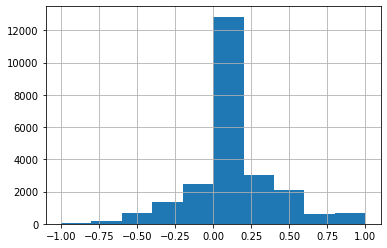

In [15]:
all_texts_comments.TextBlobPolarity.hist()

In [16]:
for el in all_texts_comments[all_texts_comments.TextBlobPolarity > 0.75].iterrows():
    print(el[1].text)

10 in decimal is 2. lol
Wonderful course... the best explanation on binary numbers. Well done HyperSkills!
More examples for binary counting!!!
great
Great explanation👍
"10 types of people". Good one Hyperskill!
This is one of the best explanation of Bayes' theorem I've seen.
This is one of the best explanations of Bayes' theorem I've seen.
lol nice adjustments of studying which means you understand it! lol
very nice job explaining. Thank you
If A = {2, 4, 6}, B = {2, 3, 5} then A ∩ B = {2}. I think "2 points" means the example of both event is number 2 of the dice.
It is even and prime number. Dice has dots(points) :D
subhanallah this concept is great, i was study about binary number like in ip address,etc in school but the teacher does not taught me about concept like this
Awesome introduction to vectors for beginners.
lol
good stuff!
this was one of memorable lessons i've learned in school! ever since then been using binary to communicate discreetly, its just beautiful!
Good explana

In [17]:
for el in all_texts_comments[all_texts_comments.TextBlobPolarity < -0.5].iterrows():
    print(el[1].text)

There are lots of grammar mistakes and I think the explanations were quite unclear :(
are we learning math or java? :(
When you write multiplication like this: (2,4,6​)×(1,3,5​)=(2×1+4×3+6×5​)=44 it looks like an error. Consider to use curly braces or something else to sign the difference.
I've left a comment but this is a display of horrible math teaching skills. I personally hate to see it. This is what would cause a student to never want anything to do with math ever again. That is a disservice to future engineers. Horrible.
This is very complicated.
bad example
It should be mentioned in Conclusion that numerical properties of Gaussian method are rather bad and in practical applications iterative methods from libraries are applied.
Completly awful and useless at this stage.
please fix the code editor provided by this website. cannot see the editor so it is very difficult to write code
I read and read and read this maths stuff, I don't learn and just feel stupid at the end
Absolutely

### Analysis with Flair

In [ ]:
# https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb

In [36]:
#!pip3 install flair

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 401 kB 1.2 MB/s            
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 981 kB 898 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 51 kB 330 kB/s            
     |████████████████████████████████| 1.2 MB 624 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 19.7 MB 1.9 MB/s            
     |████████████████████████████████| 788 kB 1.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.6 MB 1.7 MB/s            
     |████████████████████████████████| 46 kB 1.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████|

  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=4fec66e0165dfda99d7b880ddfcbf6375df7614bdee3fe106fe62513a19dd62a
  Stored in directory: /home/anna/.cache/pip/wheels/96/f9/d3/4594b3b2fe2ee239d0c9eb861f468204652e0a1c6d03755d75
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=1b6ea0b1ddb2fe4ea9ca9ddfae19265d84553d935cd15b008c1c73e5483f8c71
  Stored in directory: /home/anna/.cache/pip/wheels/c0/74/c9/ac92f0c4c9eb137d440e86c2822aba0b96b63e608dd5737164
  Created wheel for sqlitedict: filename=sqlitedict-2.0.0-py3-none-any.whl size=15736 sha256=f91453834e2a1462e7910a577db896d29ac8262833b5c4b45ff2d3bb9bd08b66
  Stored in directory: /home/anna/.cache/pip/wheels/c3/ea/90/1812907e81ceb6c0393eb6802f7aba97d4ee157b0e15bc8101
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=11e0cf1c19c7b36284d1798d61c5ecc3bfe4449e663f13edf625a5dbe8afe84f
  Stored in

In [18]:
from flair.models import TextClassifier
from flair.data import Sentence

In [19]:
model = TextClassifier.load('en-sentiment')

2022-07-02 12:15:09,316 loading file /home/anna/.flair/models/sentiment-en-mix-distillbert_4.pt


In [22]:
def flair_polarity(text, model):
    if len(text) > 50000:
        return 0  # if text is too big, we don't analyse it
    sentence = Sentence(text)
    model.predict(sentence)
    result = sentence.labels[0].to_dict()
    if result['value'] == 'POSITIVE':
        return result['confidence']
    elif result['value'] == 'NEGATIVE':
        return -result['confidence']
    else:
        return 0

In [23]:
polarities = []

for i, row in enumerate(all_texts_comments.iterrows()):
    if i % 1000 == 0:
        print(i)
    polarity = flair_polarity(row[1].text, model)
    polarities.append(polarity)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [24]:
all_texts_comments['FlairPolarity'] = polarities
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927


In [27]:
all_texts_comments.to_csv(f'{path}/all_comments_to_theories_processed.csv', index=False)

<AxesSubplot:>

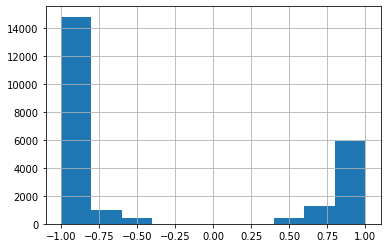

In [28]:
all_texts_comments.FlairPolarity.hist()

### Analysis with Vader

In [1]:
import pandas as pd

In [2]:
path = '/home/anna/Documents/Diploma/other_dumps/comments'

In [3]:
comments_df = pd.read_csv(f'{path}/all_comments_to_theories_processed.csv')

In [4]:
comments_df.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,1
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,1


In [6]:
#!pip3 install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 125 kB 706 kB/s            


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
sid_obj = SentimentIntensityAnalyzer()

In [9]:
def vader_polarity(text, model):
    if len(text) > 50000:
        return 0  # if text is too big, we don't analyse it
    
    # returns a sentiment dictionary that contains pos, neg, neu, and compound scores
    sentiment_dict = model.polarity_scores(text)
    
    # we are only interested in the compound score
    # if it's >0.05 it's positive, for negative vice versa
    return sentiment_dict['compound']

In [11]:
polarities = []

for i, row in enumerate(comments_df.iterrows()):
    if i % 1000 == 0:
        print(i)
    polarity = vader_polarity(row[1].text, sid_obj)
    polarities.append(polarity)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [12]:
comments_df['VaderPolarity'] = polarities
comments_df.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,VaderPolarity
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,0.7351
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0.6766
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0.0000
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,0.6705
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,0.0258


<AxesSubplot:>

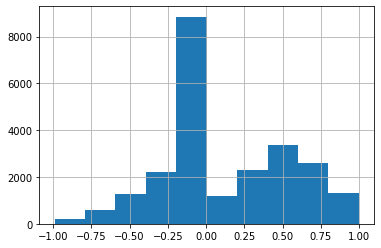

In [13]:
comments_df['VaderPolarity'].hist()

In [15]:
comments_df.to_csv(f'{path}/all_comments_to_theories_with_3_polarities.csv', index=False)

In [19]:
for el in comments_df[comments_df.VaderPolarity < -0.5].iterrows():
    print(el[1].text)
    print('<--------------------------------------------------->')

This is incorrect. "To subtract 0 from 1, we write down 1 and borrow 1 from the next digit,..." should be "To subtract 1 from 0,..." 
You have it backward.
Comment bellow Timur mentioned it but, still wrong 4 months later.
<--------------------------------------------------->
1 / 2 = 0.5 but we are using integers here I assume, so it equals 0 (rounding down?), with remainder 1? It's the only bit I'm struggling with here.
<--------------------------------------------------->
Two serious mistakes in calculations:

1) Paragraph #2(Examples):
Result of multiplication matrix ($5 $5 $10) and (5  4  6  5)
                                                                                  (7  5  3  6) 
                                                                                  (15  20  25  20) wrong.
Must be ($210 $245 $295 $255). You actually calculated (5 x 5 + 5 x 7 + 10 x 15 = 210) and wrote it correctly inbefore, but later wrote with mistake.

2) Paragraph #3(Order of multiplication):

And this applies to every operation with the modulo operation on negative numbers. At least in Python.
<--------------------------------------------------->
bad explanation!!!!!!!
<--------------------------------------------------->
bad explanation!!!!!!!
<--------------------------------------------------->
Sorry, I clicked the wrong one.
<--------------------------------------------------->
3 of my entry level programming classes neglected to teach us about loop else clauses, bravo!
<--------------------------------------------------->
hi the formula shown in "nested if-else" showed an error when i run them.
Do rectify it or am i making any mistake
<--------------------------------------------------->
No I don't want to practice because your server stucks when i submit the answers and take much time to check it is right or wrong
<--------------------------------------------------->
but many people have done this problem so but no comments????????
<-----------------------------------

In [20]:
for el in comments_df[comments_df.VaderPolarity > 0.5].iterrows():
    print(el[1].text)
    print('<--------------------------------------------------->')

"...to divide between two your friends"
I think, it should be "two of your friends".
<--------------------------------------------------->
It was not completely clear for me, how to convert with subtraction method. 
I think, it worth to mention, that we subtract the biggest power from the number only the first time. Then we should find the largest number less than result of subtraction and subtract the first one from the second one. And as I understand, when we get 0, we should stop.
Maybe those things weren't clear only for me, but the rest of the article is so beautifully detailed and this part is too short. And step-by step algorithm is slightly confusing.
<--------------------------------------------------->
A better explanation is needed with clear definitions and examples for all cases of arithmetic operations
<--------------------------------------------------->
Wonderful course... the best explanation on binary numbers. Well done HyperSkills!
<----------------------------------

Why method execute(String sql) for "select * from table ;" always return true, ever when the table is empty ?
<--------------------------------------------------->
This is some seriously important information you just provided, thanks!

The author of this article wrote:

"The first approach with the keyword new is common for reference types, while the second is only string-specific. Both approaches give us the same result for strings but they have some technical differences which we will not consider here."

And then they show on the diagram that two newly created strings with the same value will have each their own reference, but don't mention that this will happen only when you create them with the 'new' keyword.
<--------------------------------------------------->
Some more examples might improve understanding of the theory: like how to fill multidimensional arrays with user input, or using the Random class or Math.random()
<--------------------------------------------------->
valu

Hopefully that helps someone to understand one way of sorting without comparison.
<--------------------------------------------------->
I believe it is important to highlight the importance of pressing shift twice (shift+shift) to search for everything.
<--------------------------------------------------->
This topic is language-agnostic but it is useful for people who learn any programming language. Moreover, it makes easy to understand next topics directly related to Java. 

In fact, you are learning Java + the basics of Computer Science in the course.
<--------------------------------------------------->
for any node, the values of all nodes within its right subtree are greater than or equal to the value of that node
<--------------------------------------------------->
The simplest way to understand it with String class and StringBuilder.
Each time you are changing a string object java will create a new String object and
send it back as the result, i.e each change creates new objec

this is a very good chapter, packed with information. looks like we're getting to the juice =)
<--------------------------------------------------->
Hi! Can't catch an error here, could someone please help with it?

button.setOnClickListener {
    thread {
        for (i in 0..5) {
            counterTextView.setText(i.toString()) 
            Thread.sleep(100) // let's pretend we're doing some work
        }
    }
}

and here  got I've got "Type mismatch." so I use another one line

counterTextView.text = i.toString()  
->  counterTextView.setText(i.toString())
Type mismatch.
Required: Editable!
Found: String
<--------------------------------------------------->
I miss proper examples. For example when I want to use putExtra() than when I fallow the instructions the idea doesn't recognise editText.text.toString(). it says unresolved reference. If I just put a random string it would change it to that in the second activity but that is not what we want. I know that this is obvious for t

It might be good to note that when chaining, methods are executed from left to right. While 'sent.lower().split()' works, 'sent.split().lower()' does not, because lists do not a lower() method.
<--------------------------------------------------->
nice !!
<--------------------------------------------------->
Break and Else need best examples
<--------------------------------------------------->
I'm really enjoying and enjoying the platform's learning. I finally found a real learning method.

Many thanks to everyone involved in this enriching project.
<--------------------------------------------------->
More clear explanation. Please!
<--------------------------------------------------->
I still not understand that what seed() function does.
any one help me please?
<--------------------------------------------------->
Great explaination, thank you! However it is not really obvious what 15 and 10 you are telling about in this sentence:

In the first case, 11 % -5 = -4, as the remainder 